In [36]:
import tensorflow

# data

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [38]:
train_images.shape

(60000, 28, 28)

In [39]:
train_labels.shape

(60000,)

In [40]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

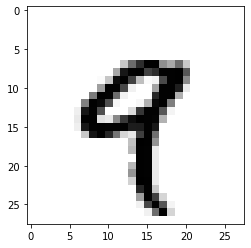

In [41]:
digit1=train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit1, cmap=plt.cm.binary)
plt.show()

# network connection

In [42]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# compilation step

In [43]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# preprocess the data

# scaling

In [44]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# reshape

In [45]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [46]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# one hot encoding for labels

In [48]:
train_labels[0]

5

In [49]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [50]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# trainning

In [51]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 25s 418us/sample - loss: 0.2604 - accuracy: 0.9244
Epoch 2/5
60000/60000 [==============================] - 19s 311us/sample - loss: 0.1039 - accuracy: 0.9690
Epoch 3/5
60000/60000 [==============================] - 20s 341us/sample - loss: 0.0685 - accuracy: 0.9795
Epoch 4/5
60000/60000 [==============================] - 18s 295us/sample - loss: 0.0499 - accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 17s 276us/sample - loss: 0.0375 - accuracy: 0.9888


In [52]:
network.fit(train_images, train_labels, epochs=20, batch_size=128)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 287us/sample - loss: 0.0287 - accuracy: 0.9917
Epoch 2/20
60000/60000 [==============================] - 19s 323us/sample - loss: 0.0222 - accuracy: 0.9933
Epoch 3/20
60000/60000 [==============================] - 16s 271us/sample - loss: 0.0167 - accuracy: 0.9951
Epoch 4/20
60000/60000 [==============================] - 20s 329us/sample - loss: 0.0129 - accuracy: 0.9962
Epoch 5/20
60000/60000 [==============================] - 21s 343us/sample - loss: 0.0099 - accuracy: 0.9975
Epoch 6/20
60000/60000 [==============================] - 20s 336us/sample - loss: 0.0079 - accuracy: 0.9977
Epoch 7/20
60000/60000 [==============================] - 18s 298us/sample - loss: 0.0062 - accuracy: 0.9982
Epoch 8/20
60000/60000 [==============================] - 18s 294us/sample - loss: 0.0052 - accuracy: 0.9986
Epoch 9/20
60000/60000 [==============================] - 17s 292us/sample - loss: 0.0035 - accuracy: 0.9

In [53]:
network.fit(train_images, train_labels, epochs=25, batch_size=128)

Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 18s 302us/sample - loss: 1.8915e-04 - accuracy: 1.0000
Epoch 2/25
60000/60000 [==============================] - 19s 311us/sample - loss: 2.8583e-04 - accuracy: 0.9999
Epoch 3/25
60000/60000 [==============================] - 20s 341us/sample - loss: 1.6421e-04 - accuracy: 1.0000- loss: 1.6346e-04 - accura
Epoch 4/25
60000/60000 [==============================] - 25s 425us/sample - loss: 1.2325e-04 - accuracy: 0.9999
Epoch 5/25
60000/60000 [==============================] - 18s 304us/sample - loss: 1.3104e-04 - accuracy: 1.0000
Epoch 6/25
60000/60000 [==============================] - 18s 293us/sample - loss: 1.4912e-04 - accuracy: 0.9999
Epoch 7/25
60000/60000 [==============================] - 17s 291us/sample - loss: 8.6266e-05 - accuracy: 1.0000
Epoch 8/25
60000/60000 [==============================] - 18s 298us/sample - loss: 2.7269e-04 - accuracy: 0.9999
Epoch 9/25
60000/60000 [======================

# testing

In [54]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================